
# 🧩 Mini-Proiect: Regresie și Îmbunătățire de Model



In [2]:
# 🔹 1️⃣ Alegeți un dataset


# 💎 Diamonds => https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv
# 🐧 Penguins => https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv
# 🚗 Auto MPG => https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv
# 💊 Medical Insurance => https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

# ✏️ Ce dataset ați ales și de ce?
# Răspuns: Diamonds


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 100)

In [4]:
# Verificați datele =>

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

# Citim CSV-ul într-un DataFrame (tabel Pandas)
df = pd.read_csv(url)

# Vizualizăm primele 5 rânduri (sanity check)
df.head()

# Sunt inconsistențe în date pe care ar trebui sa le tratăm?
# nu avem date inconsistente, nu avem date NULL sau NAN

# Sunt outlieri?
# da, avem preturi foarte mari

# Realizați cel puțin 2 vizualizări pe datele pe care plănuim să le folosim ca să observăm forma lor

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
import pandas as pd

for col in df.select_dtypes(exclude=['number']).columns:
    print(f"Coloana: {col}")
    print(df[col].unique())
    print("-" * 30)


Coloana: cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
------------------------------
Coloana: color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
------------------------------
Coloana: clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
------------------------------


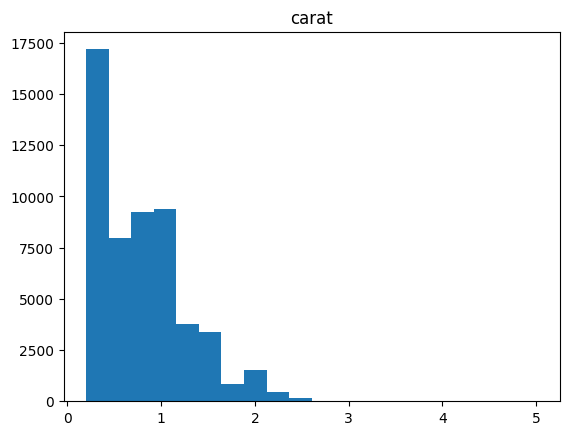

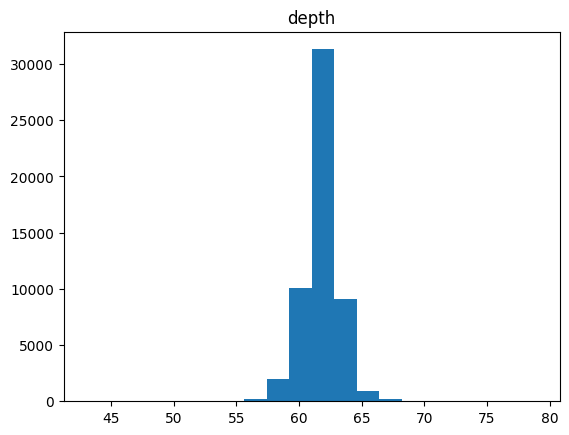

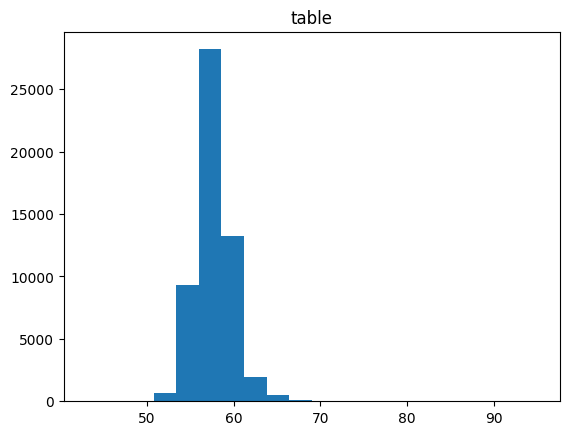

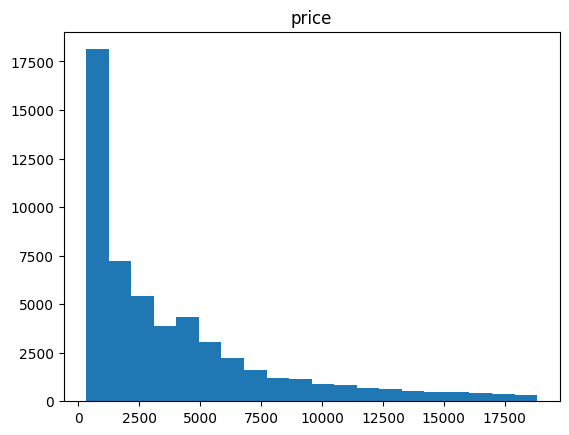

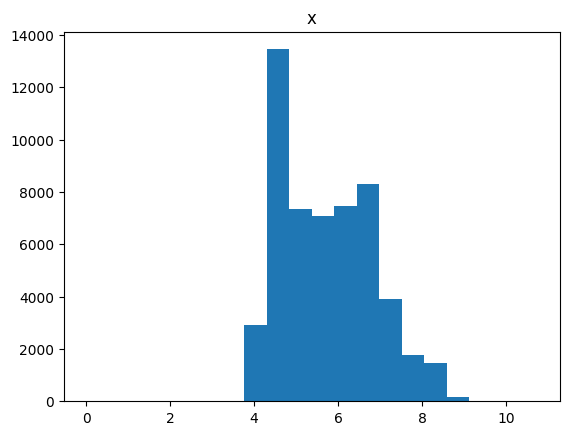

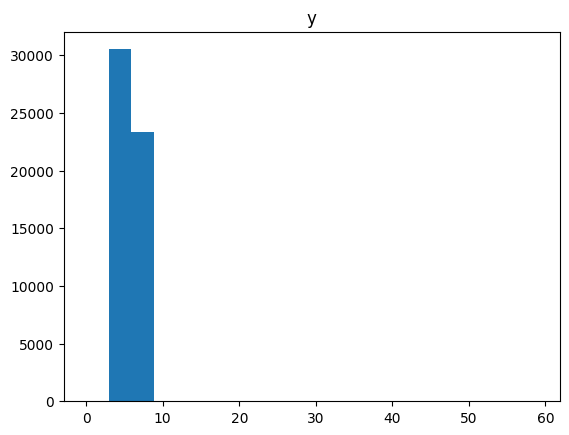

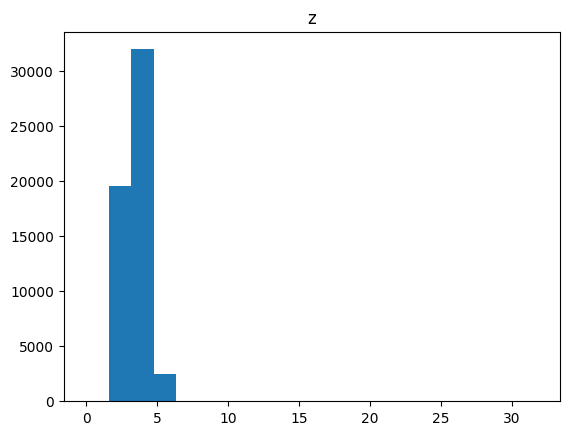

In [8]:
for col in df.select_dtypes(include='number').columns:
    plt.figure()
    plt.hist(df[col].dropna(), bins=20)
    plt.title(col)
    plt.show()

In [9]:
# 🔹 2️⃣ Alegeți o variabilă țintă


# Ex: 'price', 'carat', 'mpg', 'charges' etc.

# ✏️ Ce variabilă țintă ați ales?
# Răspuns: price

# ✏️ De ce considerați că este o alegere potrivită?
# Răspuns: toate celelalte variabile pot fi masurabile. cel mai potrivit este sa prezicem pretul


In [10]:
# Cu ce date se corelează variabila țintă?

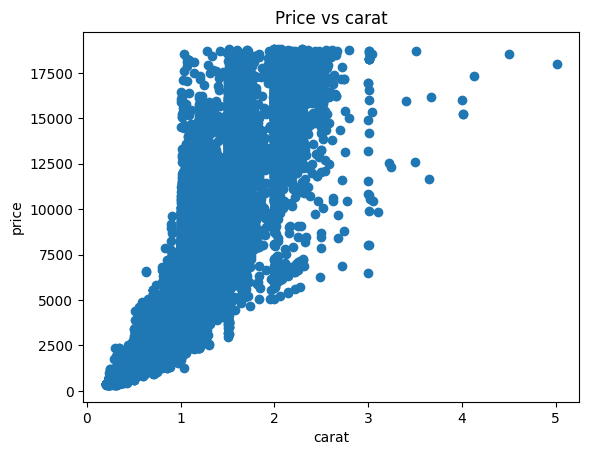

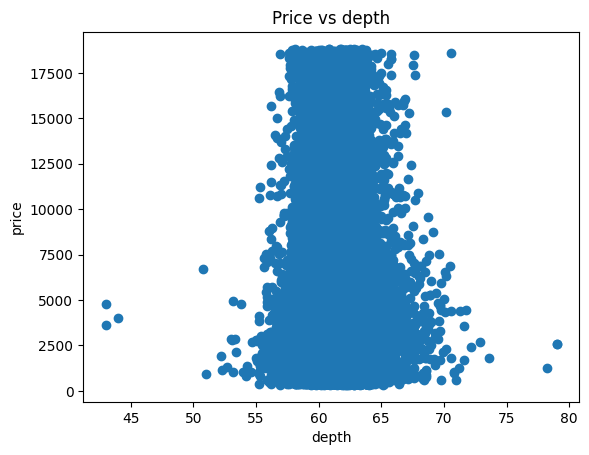

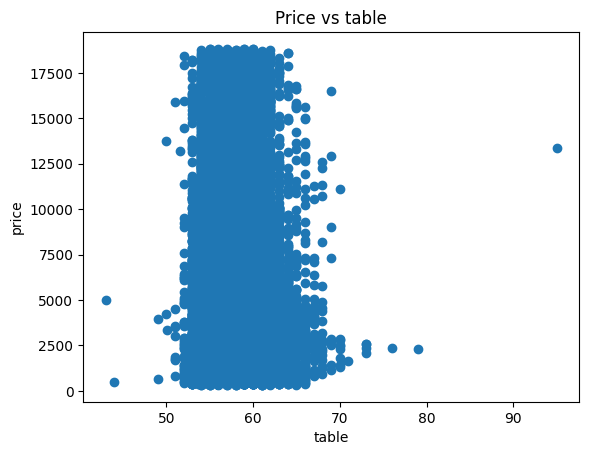

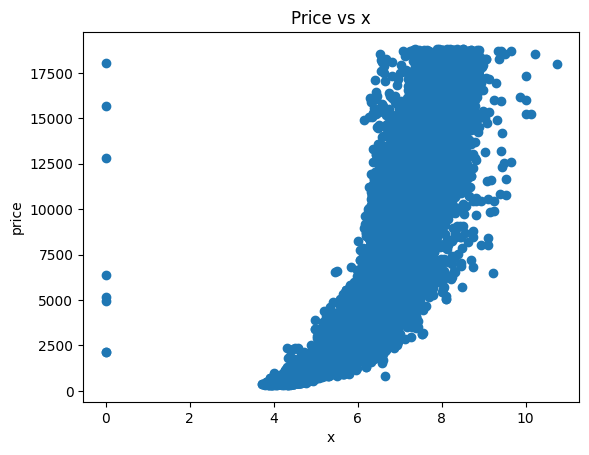

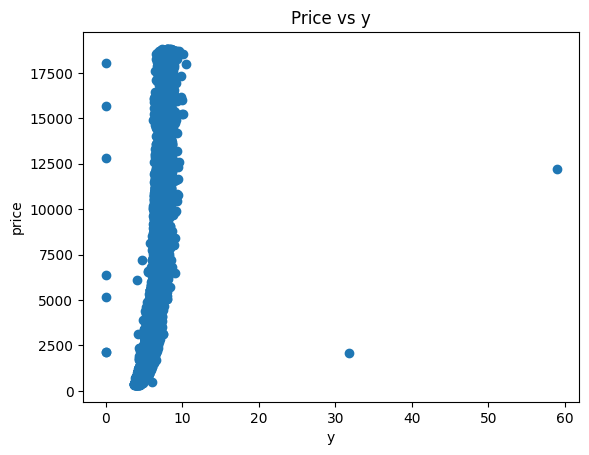

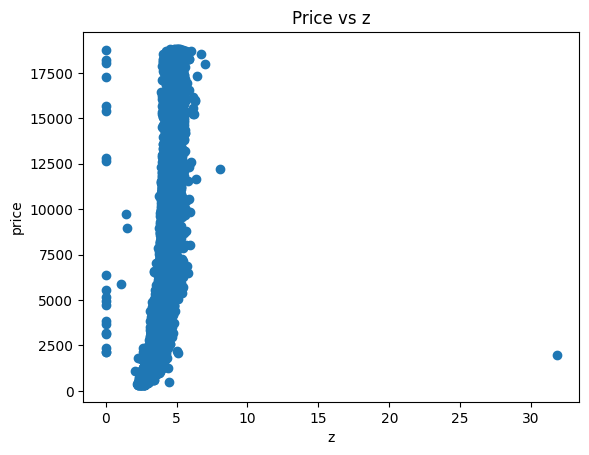

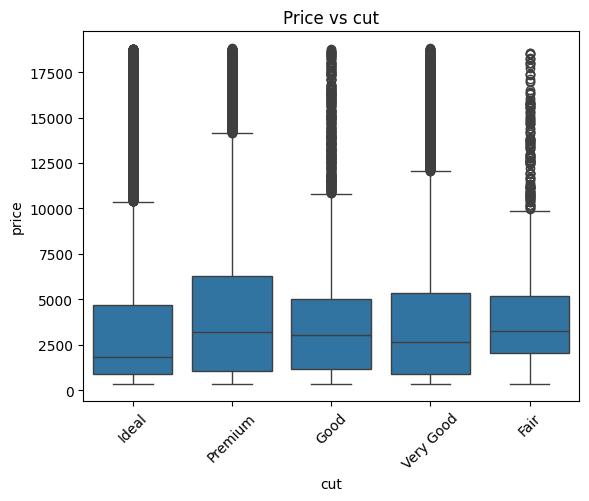

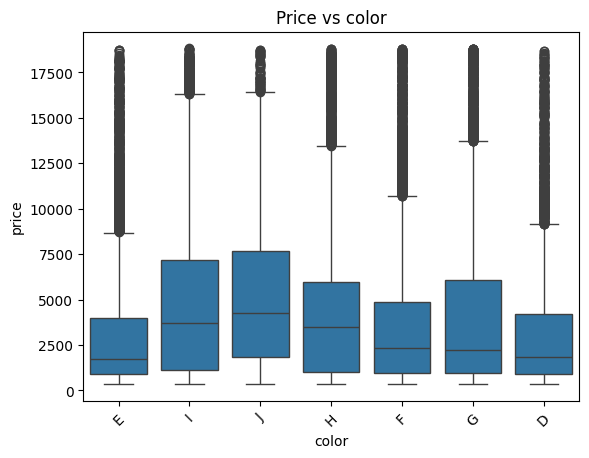

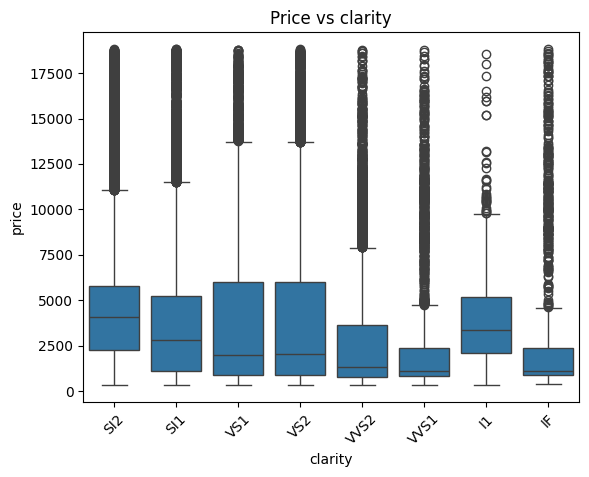

In [11]:
# coloane numerice și categorice
num_cols = df.select_dtypes(include='number').columns.drop('price')
cat_cols = df.select_dtypes(exclude='number').columns

# Scatter plots pentru numerice
for col in num_cols:
    plt.figure()
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
    plt.show()

# Boxplots pentru categorice
for col in cat_cols:
    plt.figure()
    sns.boxplot(x=df[col], y=df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# 🔹 3️⃣ Construiți un model inițial

# Tipuri posibile:
# - Linear Regression
# - Multiple Regression
# - Polynomial Regression

# ✏️ Ce tip de model ați ales?
# Răspuns: Multiple Regression

# ✏️ De ce ați ales acest tip de model?
# Răspuns: pretul pare sa depinda liniar de mai multe variabile


# Notă - nu uitați să faceți split-ul pe date pe train / test

In [13]:
# codam variabilele categorice
# codare ordinala pentru cut
cut_order = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut'] = df['cut'].map(cut_order)

# one hot pentru color si clarity
df = pd.get_dummies(df, columns=['color','clarity'], drop_first=False)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 🔹 4️⃣ Evaluați performanța modelului


# Calculați următoarele metrici:
# - RMSE (Root Mean Squared Error)
# - R² (coeficientul de determinare)
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

# R^2
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# ✏️ Care este valoarea RMSE obținută?
# Răspuns: 1137.6229089400128

# ✏️ Care este valoarea R² obținută?
# Răspuns: 0.9185883865580821

# ✏️ Cum interpretați aceste rezultate?
# Răspuns: este bine. la RMSE avem 1200, adica modelul greseste cu 1200 la pret, iar un R^2 de 0.92 indica faptul ca modelul acopera peste 90% din variatie


R^2: 0.9185883865580821
RMSE: 1137.6229089400128


In [24]:
# 🔹 5️⃣ Îmbunătățiți modelul


# Încercați una sau mai multe dintre:
# - Normalizare / Standardizare
# - Regularizare (Ridge / Lasso)
# - Grad polinomial diferit
# - Schimbarea unor feature-uri

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

# coloanele numerice
num_cols = ['carat', 'cut', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

model2 = LinearRegression()
model2.fit(X_train, y_train)

lasso = Lasso(alpha=0.1, max_iter=10000)  # alpha = coef penalizare, ajustezi
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=1, max_iter=10000)  # alpha = coef penalizare
ridge.fit(X_train, y_train)

y_pred_test = model2.predict(X_test)
# R^2
r2_2 = r2_score(y_test, y_pred_test)
print("R^2 2:", r2_2)

# RMSE
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE 2:", rmse_2)

y_pred_test = lasso.predict(X_test)
# R^2
r2_lasso = r2_score(y_test, y_pred_test)
print("R^2 lasso:", r2_lasso)

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE lasso:", rmse_lasso)

y_pred_test = ridge.predict(X_test)
# R^2
r2_ridge = r2_score(y_test, y_pred_test)
print("R^2 ridge:", r2_ridge)

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE ridge:", rmse_ridge)


# ✏️ Ce modificări ați adus modelului?
# Răspuns: am facut standardizare, am creat 2 modele ptr regularizare

# ✏️ De ce ați ales aceste metode de îmbunătățire?
# Răspuns: pentru a avea diversitate la predictie, ptr a compara mai multe modele


R^2 2: 0.9185883865580821
RMSE 2: 1137.6229089400128
R^2 lasso: 0.9185911241153227
RMSE lasso: 1137.603781853097
R^2 ridge: 0.918590243144736
RMSE ridge: 1137.609937157104


In [ ]:
# 🔹 6️⃣ Comparați rezultatele (înainte vs după)


# ✏️ Care au fost valorile RMSE și R² înainte de îmbunătățire?
# Răspuns: R^2: 0.9185883865580821 RMSE: 1137.6229089400128

# ✏️ Care sunt valorile RMSE și R² după îmbunătățire?
# Răspuns: R^2: 0.9185883865580821 RMSE: 1137.6229089400128

# ✏️ Ce metodă a ajutat cel mai mult?
# Răspuns: metodele sunt cam la fel dpdv al performantei. standardizarea datelor nu a adus un plus deoarece corelatiile dintre features si target indicau liniaritatea,
# astfel pastrandu-se la orice interval.

# ✏️ De ce credeți că acea metodă a fost eficientă?
# Răspuns:


In [ ]:
# 🔹 💡 Concluzie finală


# ✏️ Ce ați învățat din acest experiment despre:
# - Alegerea tipului de model
# - Rolul normalizării / regularizării
# - Impactul metricilor în evaluarea performanței

# Răspuns: in acest exemplu, datele au fost foarte sugestive, astfel ca n ua fost nevoie de metode de standardizare sau regularizare ptr a atinge performante mai bune
